In [3]:
import seaborn as sb
import pandas as pd
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter1d

In [4]:
filename = '/home/ips/projects/tatar-tts-2/VITS/vits/logs/multispeaker/train.log'

In [5]:
epochs = []
losses = []

with open(filename) as file:
    for line in file:
        if line.rstrip().endswith(']'):
            if 'Epoch' in line.rstrip():
                epochs.append(int(line.rstrip()[55:].split(' ')[0]))
            else:
                losses.append(line.rstrip()[line.rstrip().index('[') + 1:line.rstrip().index(']')].split(', '))

In [6]:
#epochs = epochs[300:]
#losses = losses[300:]
print(len(epochs))
print(len(losses))

310
310


In [7]:
losses_types = ('loss_disc', 'loss_gen', 'loss_fm', 'loss_mel', 'loss_dur', 'loss_kl')
losses_dict = {}

for i_loss_type in range(len(losses_types)):
    loss_arr = []
    for loss in losses:
        loss_arr.append(float(loss[i_loss_type]))
    losses_dict[losses_types[i_loss_type]] = loss_arr

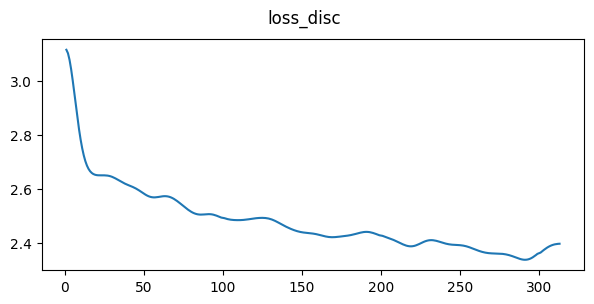

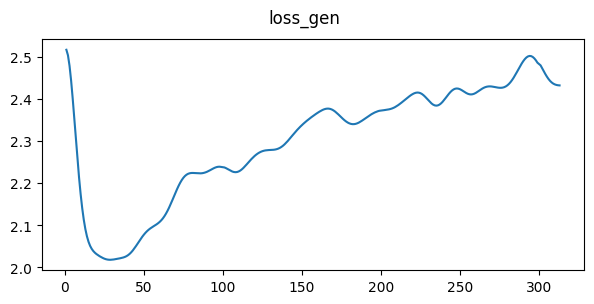

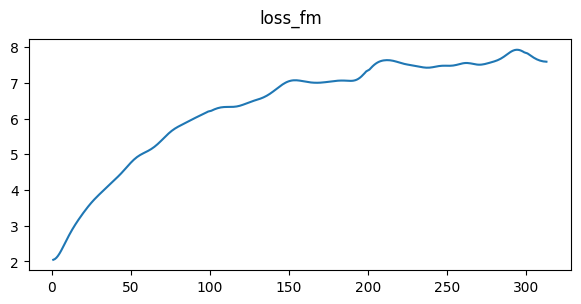

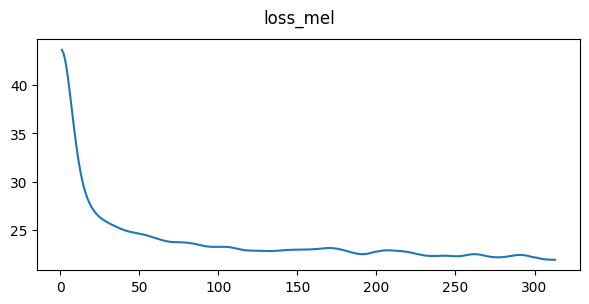

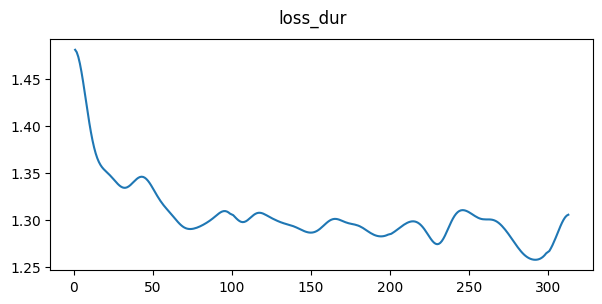

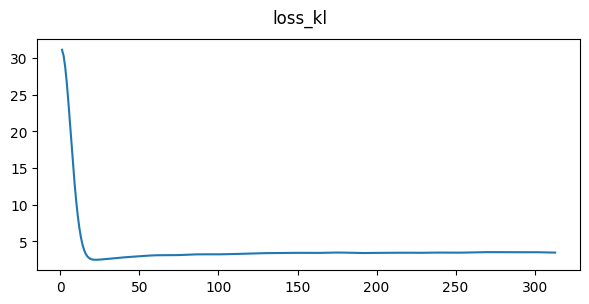

In [10]:
for key in losses_dict:
    fig, ax = plt.subplots(figsize=(7, 3))
    fig.suptitle(key)
    plt.plot(epochs, gaussian_filter1d(losses_dict[key],sigma=6))